In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import itertools

def build_network(N,M,B):
    """
    Builds a network of N nodes and M random edges between them. 
    Assigns each node one of B opinions randomly.
    Returns the network.
    """
    # Make graph
    G = nx.Graph()
    nodes = range(1, N + 1) # make n nodes
    G.add_nodes_from(nodes)

    possible_edges = list(itertools.combinations(nodes, 2))
    edges = random.sample(possible_edges, M) 
    G.add_edges_from(edges) # make m edges among n nodes randomly

    # Assign opinions
    opinions = range(1, B + 1) # B different beliefs
    for i in G.nodes():
        G.nodes[i]["opinion"] = random.choice(opinions)
    
    return G


def print_network(G):
    """
    Prints an image of the network.
    """
    pos = nx.circular_layout(G)
    G_colors = [G.nodes[n]["opinion"] for n in G.nodes()]
    plt.figure()
    nx.draw(G, with_labels=True, pos=pos, node_color = G_colors)
    plt.show()

def print_network_comparison(G, G1):
    """
    Prints an image of the network before and after reaching consensus.
    """
    pos = nx.circular_layout(G)
    G_colors = [G.nodes[n]["opinion"] for n in G.nodes()]
    G1_colors = [G1.nodes[n]["opinion"] for n in G1.nodes()]

    plt.figure(figsize=(12, 5))
    plt.subplot(1,2,1)
    nx.draw(G, with_labels=True, pos=pos, node_color = G_colors)
    plt.title("Initial network")

    plt.subplot(1,2,2)
    nx.draw(G1, with_labels=True, pos=pos, node_color = G1_colors)
    plt.title("Consensus network")

    plt.show()



def change(G, i, p):
    """
    Makes a single change to the graph. For node i, either:
    With probability p, rewires edge (i,j) to (i, j_new), where i and j_new share the same opinion.
    Or, with probability 1-p, changes the opinion of node i to match a neighbor j.
    Returns the changed graph
    """
    G1 = G.copy()
    nbrs = list(G1.neighbors(i))
    if nbrs:
        j = random.choice(nbrs)
        
        if random.random() < p:

            possible_neighbors = [
                n for n, d in G1.nodes(data=True)
                if d["opinion"] == G1.nodes[i]["opinion"] # can connect only to same opinion
                and n not in nbrs # cant connect to node that is already neighbor or to j
                and n != i
                ]
            
            if possible_neighbors: # continue if there are neighbors available
                G1.remove_edge(i,j)
                j_new = random.choice(possible_neighbors)
                G1.add_edge(i, j_new)
                #print(f"Rewiring edge {(i,j)} to be {(i,j_new)}.")
        
        else:
            #print(f"Changing opinion of node {i} to opinion of node {j} (From opinion {G1.nodes[i]["opinion"]} to opinion {G1.nodes[j]["opinion"]}).")
            G1.nodes[i]["opinion"] = G1.nodes[j]["opinion"]

    return G1


def is_consensus(G):
    """
    Returns that consensus is true only when no neighbors hold different opinions from eachother.
    """
    return all(
        G.nodes[u]["opinion"] == G.nodes[v]["opinion"]
        for u, v in G.edges()
    )

def simulate_change_until_consensus(G, change_param=0.5):
    """
    Simulates the given network changing until it reaches consensus.
    Returns the changed network and number of rewirings/influences needed to reach consensus.
    """
    G1 = G.copy()
    t = 0

    while not is_consensus(G1):
        i = random.choice(list(G1.nodes()))
        G1 = change(G1, i, change_param)
        t += 1
    
    return G1,t

In [ ]:
# choose parameters
N = 20 #number of nodes
M = 35 #number of edges
B = 4 #number of possible beliefs
p = 0.5

# Build and print the graph
G = build_network(N,M,B)

# Simulate
G_consensus, time = simulate_change_until_consensus(G, change_param=0.5)

# Analyse
print_network_comparison(G, G_consensus)
print(f"It took {time} rewirings/influences to reach consensus.")

In [20]:
# choose parameters
N = 1000 #number of nodes
M = 1500 #number of edges
B = 100 #number of possible beliefs
p = 0.5

# Build and print the graph
G = build_network(N,M,B)
#print_network(G)

# Simulate
G_consensus, time = simulate_change_until_consensus(G,change_param=0.5)

# Analyse
#print_network(G_consensus)
print(f"It took {time} rewirings/influences to reach consensus")

It took 69779 rewirings/influences to reach consensus


[25, 4, 35, 18, 15, 16, 7, 8, 11, 1, 9, 1, 30, 47, 38, 1, 13, 7, 14, 20, 14, 11, 18, 9, 19, 10, 23, 11, 5, 1, 16, 6, 6, 1, 8, 11, 16, 14, 14, 3, 4, 10, 13, 5, 7, 34, 9, 9, 13, 6, 12, 1, 10, 4, 11, 7, 20, 4, 10, 1, 9, 6, 5, 15, 5, 1, 5, 16, 15, 8, 19, 8, 1, 1, 9, 3, 7, 1, 1, 11, 2, 8, 5, 6, 8, 3, 7, 3, 10, 3, 3, 10, 18, 1, 6, 5, 1, 1, 1, 1, 3, 1, 1, 1, 4, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1]


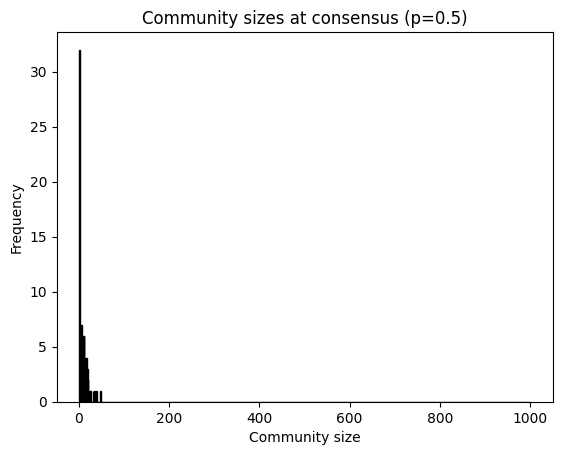

In [ ]:
# Commmunity sizes
communities = list(nx.connected_components(G))
sizes = [len(c) for c in communities]
print(sizes)

plt.figure()
plt.hist(sizes, bins=range(1, N+2), edgecolor='black')
plt.xlabel("Community size")
plt.ylabel("Frequency")
plt.title(f"Community sizes at consensus (p={p})")
plt.show()